<h1>Introduction</h1>
To Determine the Best Neighborhood in Pittsburgh we decided to use safety information. We thought about multiple approachs including best neighborhood for children or people without cars, based on data of schools or walkable distances. However, we decided to base our answer on safety, becuase we thought it was a universal attribute that all people looked for in neighborhoods. 

We looked through the data of 3 data sets and sorted them based on neighborhoods, traffic data, amount of fires and amount of crime in the past month in the respective neighborhoods. See the code that we used to analyze this data below. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


chip = pd.read_csv("Traffic_Data.csv", sep=",")
traffic_grouped = chip.groupby('neighborhood', as_index=False)['average_daily_car_traffic'].sum()
traffic_grouped.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)

url = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
data = pd.read_csv(url)
fire_counts = data['neighborhood'].value_counts().reset_index()
fire_counts.columns = ['Neighborhood', 'Fire Count']

crime = pd.read_csv("crime.csv", index_col="_id")
crime_counts_df = (
    crime.groupby("INCIDENTNEIGHBORHOOD")
         .size()
         .reset_index(name="Crime Count")
         .rename(columns={"INCIDENTNEIGHBORHOOD": "Neighborhood"})
)

merged = traffic_grouped.merge(fire_counts, on="Neighborhood", how="outer")
merged = merged.merge(crime_counts_df, on="Neighborhood", how="outer")

merged.fillna(0, inplace=True)

merged['Traffic Rank'] = merged['average_daily_car_traffic'].rank(method='min')
merged['Fire Rank'] = merged['Fire Count'].rank(method='min')
merged['Crime Rank'] = merged['Crime Count'].rank(method='min')

merged['Total Rank'] = merged['Traffic Rank'] + merged['Fire Rank'] + merged['Crime Rank']

final_ranking = merged.sort_values(by='Total Rank')

print(final_ranking[['Neighborhood', 'Total Rank', 'average_daily_car_traffic', 'Fire Count', 'Crime Count']].head(20))





                   Neighborhood  Total Rank  average_daily_car_traffic  \
59      Mt. Oliver Neighborhood         5.0                        0.0   
93       Troy Hill-Herrs Island         6.0                        0.0   
58              Mt. Oliver Boro         7.0                        0.0   
55         Mount Oliver Borough        12.0                        0.0   
57                   Mt. Oliver        15.0                        0.0   
66               Outside County        16.0                        0.0   
67                Outside State        17.0                        0.0   
37  Golden Triangle/Civic Arena        20.0                        0.0   
75                    Ridgemont        21.0                        0.0   
54                 Mount Oliver        22.0                        0.0   
27                East Carnegie        25.0                        0.0   
90               Swisshelm Park        29.0                        0.0   
64                      Oakwood       

<h1>What does this data mean?</h1>
The data plot is a combination of the best metrics of each statistic. We determined that the Mt. Oliver Neighborhood was the best neighborhood as it had a perfect traffic score, combined with a low crime rate per month and and a perfect fire count. Below we can see a visual representation of the data and we can see that Mt. Oliver is the best as it has the lowest amount of negative occurences along with the added perfect traffic score. 

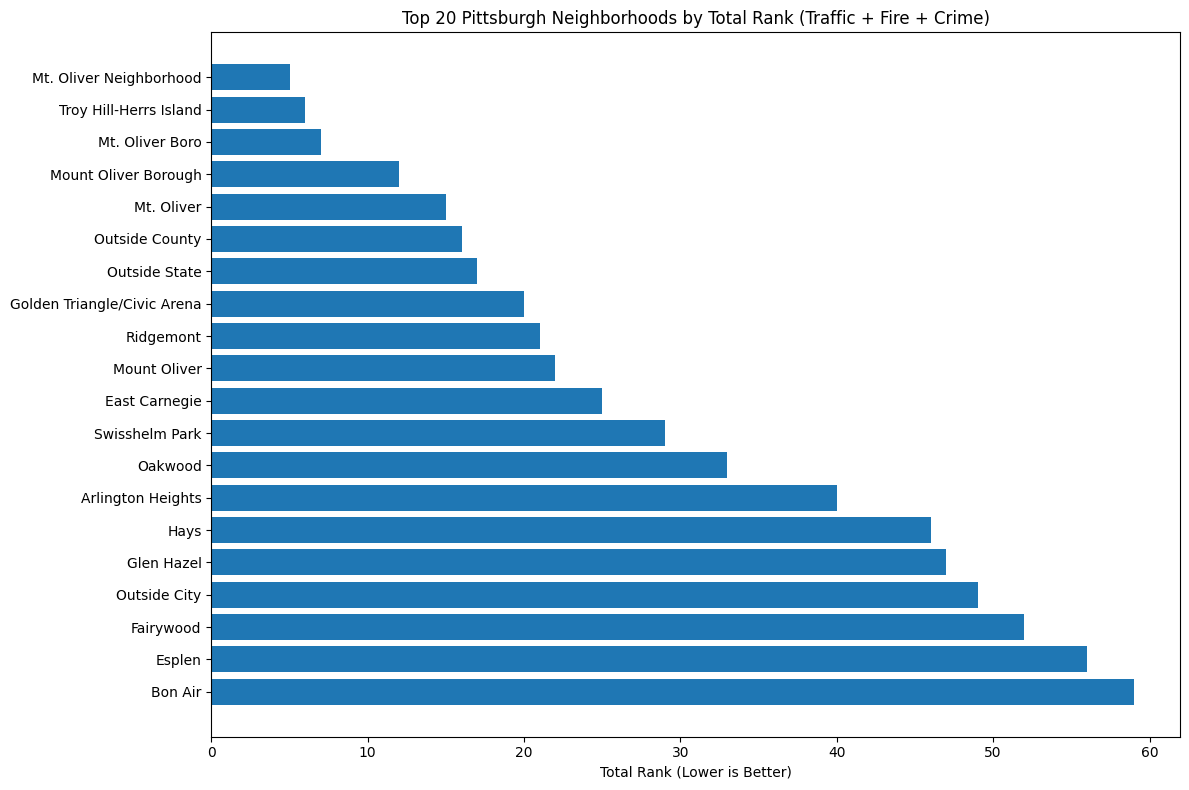

In [7]:
#visuals using matplotlib
top_20 = final_ranking[['Neighborhood', 'Total Rank', 'average_daily_car_traffic', 'Fire Count', 'Crime Count']].head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_20['Neighborhood'], top_20['Total Rank'])
plt.xlabel('Total Rank (Lower is Better)')
plt.title('Top 20 Pittsburgh Neighborhoods by Total Rank (Traffic + Fire + Crime)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()